In [1]:
#@title Copyright 2020 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Validation Sets and Test Sets

latihan Colab sebelumnya mengevaluasi model yang telah dilatih terhadap test set, yang tidak memberikan sinyal kuat tentang kualitas model anda. di Colab ini, kamu akan bereksperimen dengan validation set dan test set.

## Tujuan Pembelajaran

Setelah mengerjakan Colab ini, kamu akan tau melakukan hal-hal berikut :
- Memecah **training set** menjadi training set yang lebih kecil dan **validation set**.
- Menganalisis delta antara hasil **training set** dan **validation result**
- Menguji model yang telah dilatih menggunakan **test set** untuk menentukan apakah model yang telah dilatih **overfitting** atau tidak.
- Mendeteksi dan membetulkan masalah-masalah umum pada training.

## Dataset

Sama dengan latihan sebelumnya, latihan ini menggunakan *dataset California Housing* untuk memprediksi `median_house_value` ditingkatan level blok kota. Seperti kebanyakan dataset, dataset California Housing terdiri dari 2 dataset terpisah, setiapnya terpisah ke file `.csv`:
- Training set terdapat di `california_housing_train.csv`
- Test set terdapat di `california_housing_test.csv`

Kamu akan membuat validation set dengan memisahkan training set yang telah didownload menjadi 2 bagian :
- training set yang lebih kecil
- validation set

## Import modul yang dibutuhkan

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

## Load dataset dari internet
kode dibawah akan me-load file `.csv` terpisah dan membuat 2 pandas DataFrame :
- `train_df`, yang berisi training set
- `test_df`, yang berisi test set

In [3]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

## Skala nilai label
kode berikut akan menskala `median_house_value`. Lihat latihan sebelumnya untuk detailnya.

In [4]:
scale_factor = 1000.0

# Scale the training set's label
train_df["median_house_value"] /= scale_factor

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

## Load fungsi untuk build dan train model
Kode berikut akan mendefinisikan 2 fungsi:
- `build_model`, yang mendefinisikan topografi model
- `train_model`, yang akan melatih model, mengeluarkan tidak hanya loss value untuk training set tapi juga loss value untuk validation set

In [6]:
def build_model(my_learning_rate):
    """Create and compile a simple linear regression model"""
    model = tf.keras.models.Sequential()

    # Add one linear layer to the model to yield a simple linear regressor
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

    # Compile the model topography into code that Tensorflow can efficiently
    # execute. Configure training to minimize the model's mean squared error
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate), loss="mean_squared_error", metrics=[tf.keras.metrics.RootMeanSquaredError()])

    return model

def train_model(model, df, feature, label, my_epochs, my_batch_size=None, my_validation_split=0.1):
    # Feed a dataset into the model in order to train it

    history = model.fit(x=df[feature], y=df[label], batch_size=my_batch_size, epochs=my_epochs, validation_split=my_validation_split)

    # Gather the model's trained weight and bias
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]

    # the list of epochs is stored separately from the rest of history
    epochs = history.epoch

    # Isolate the root mean squared error for each epoch
    hist = pd.DataFrame(history.history)
    rmse = hist["root_mean_squared_error"]

    return epochs, rmse, history.history

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


## Mendefinisikan fungsi plotting
fungsi `plot_the_loss_curve` memplotkan loss terhadap epoch-nya untuk setiap training set dan validation set

In [7]:
def plot_the_loss_curve(epochs, mae_training, mae_validation):
    # Plot a curve of loss vs epoch

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
    plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
    plt.legend()

    # We're not going to plot the first epoch, since the loss on the first epoch is often
    # substantially greater than the loss for other epochs
    merged_mae_lists = mae_training[1:] + mae_validation[1:]
    highest_loss = max(merged_mae_lists)
    lowest_loss = min(merged_mae_lists)
    delta = highest_loss - lowest_loss
    print(delta)

    top_of_y_axis = highest_loss + (delta * 0.05)
    bottom_of_y_axis = lowest_loss - (delta * 0.05)

    plt.ylim([bottom_of_y_axis, top_of_y_axis])
    plt.show()

print("Defined the plot_the_loss_curve function")

Defined the plot_the_loss_curve function


## Tugas 1 : Bereksperimen dengan validation split
Dalam sel kode berikut, kamu akan mendapati variabel bernama `validation_split`, dimana telah diinisialisasi dengan nilai 0.2. Variabel `validation_split` akan menspesifikan proporsi dari training set asli yang akan digunakan sebagai validation set. Training set asli berisi 17.000 contoh.
Karena itu, `validation_split` bernilai 0.2 berarti :
- 17.000 * 0,2 ~= 3.400 contoh yang akan menjadi validation set.
- 17.000 * 0,8 ~= 13.600 contoh akan menjadi training set yang baru.

Kode berikut akan membangung model, melatihnya menggunakan training set, dan mengevaluasi model yang telah dibangun menggunakan :
- training set
- dan validation set

jika data di training set mirip dengan data di validation set, maka nilai kedua kurva loss dan final loss seharusnya hampir mirip. Namun, kurva loss dan final loss hampir tidak identik. Hmm, ini aneh.

Bereksperimen lah dengan 2 atau 3 nilai `validation_split`. Apakah nilai berbeda dari `validation_split` memecahkan masalah ?

Epoch 1/30
136/136 [==============================] - 1s 4ms/step - loss: 43405.8394 - root_mean_squared_error: 208.2152 - val_loss: 46768.5977 - val_root_mean_squared_error: 216.2605
Epoch 2/30
136/136 [==============================] - 0s 1ms/step - loss: 25379.5537 - root_mean_squared_error: 159.1913 - val_loss: 27184.9434 - val_root_mean_squared_error: 164.8786
Epoch 3/30
136/136 [==============================] - 0s 1ms/step - loss: 13436.1616 - root_mean_squared_error: 115.7899 - val_loss: 14689.5303 - val_root_mean_squared_error: 121.2004
Epoch 4/30
136/136 [==============================] - 0s 1ms/step - loss: 7633.6386 - root_mean_squared_error: 87.3223 - val_loss: 9502.1133 - val_root_mean_squared_error: 97.4788
Epoch 5/30
136/136 [==============================] - 0s 2ms/step - loss: 6573.0712 - root_mean_squared_error: 81.0681 - val_loss: 9284.5654 - val_root_mean_squared_error: 96.3565
Epoch 6/30
136/136 [==============================] - 0s 1ms/step - loss: 6522.6451 - ro

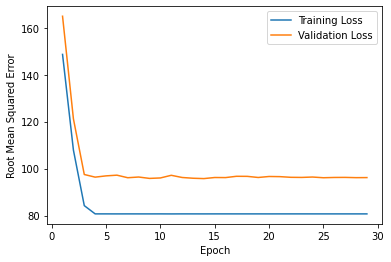

In [8]:
# the following variables are the hyperparameters
learning_rate = 0.08
epochs = 30
batch_size = 100

# Split the original training set into a reduced training set and a validation set
validation_split = 0.2

# Identify the feature and the label
my_feature = "median_income" # the median income on a specific city block
my_label = "median_house_value" # the median value of a house on a specific city block
# That is, you're going to create a model that predicts house value based solely on the neighborhood's median income

# Discard any pre-existing version of the model
my_model = None

# Invoke the function to build and train the model
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature, my_label, epochs, batch_size, validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], history["val_root_mean_squared_error"])

Epoch 1/30
153/153 [==============================] - 1s 2ms/step - loss: 45391.1566 - root_mean_squared_error: 212.8762 - val_loss: 45693.9531 - val_root_mean_squared_error: 213.7614
Epoch 2/30
153/153 [==============================] - 0s 1ms/step - loss: 24254.8858 - root_mean_squared_error: 155.5751 - val_loss: 26623.9219 - val_root_mean_squared_error: 163.1684
Epoch 3/30
153/153 [==============================] - 0s 1ms/step - loss: 11749.0095 - root_mean_squared_error: 108.2504 - val_loss: 15097.7773 - val_root_mean_squared_error: 122.8730
Epoch 4/30
153/153 [==============================] - 0s 1ms/step - loss: 6838.1737 - root_mean_squared_error: 82.6727 - val_loss: 11993.9814 - val_root_mean_squared_error: 109.5170
Epoch 5/30
153/153 [==============================] - 0s 1ms/step - loss: 6450.8395 - root_mean_squared_error: 80.3092 - val_loss: 12064.9863 - val_root_mean_squared_error: 109.8407
Epoch 6/30
153/153 [==============================] - 0s 1ms/step - loss: 6490.1803 

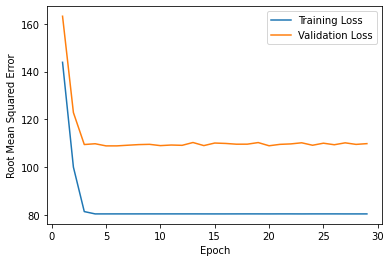

In [9]:
# the following variables are the hyperparameters
learning_rate = 0.08
epochs = 30
batch_size = 100

# Split the original training set into a reduced training set and a validation set
validation_split = 0.1

# Identify the feature and the label
my_feature = "median_income" # the median income on a specific city block
my_label = "median_house_value" # the median value of a house on a specific city block
# That is, you're going to create a model that predicts house value based solely on the neighborhood's median income

# Discard any pre-existing version of the model
my_model = None

# Invoke the function to build and train the model
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature, my_label, epochs, batch_size, validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], history["val_root_mean_squared_error"])

Epoch 1/30
119/119 [==============================] - 1s 3ms/step - loss: 42878.5079 - root_mean_squared_error: 206.9805 - val_loss: 40528.6836 - val_root_mean_squared_error: 201.3174
Epoch 2/30
119/119 [==============================] - 0s 2ms/step - loss: 27253.2690 - root_mean_squared_error: 164.9759 - val_loss: 24715.1133 - val_root_mean_squared_error: 157.2104
Epoch 3/30
119/119 [==============================] - 0s 2ms/step - loss: 16062.8098 - root_mean_squared_error: 126.6407 - val_loss: 14128.0537 - val_root_mean_squared_error: 118.8615
Epoch 4/30
119/119 [==============================] - 0s 2ms/step - loss: 9215.5902 - root_mean_squared_error: 95.9223 - val_loss: 8662.6357 - val_root_mean_squared_error: 93.0733
Epoch 5/30
119/119 [==============================] - 0s 2ms/step - loss: 6986.4516 - root_mean_squared_error: 83.5272 - val_loss: 7716.7998 - val_root_mean_squared_error: 87.8453
Epoch 6/30
119/119 [==============================] - 0s 1ms/step - loss: 6844.0332 - ro

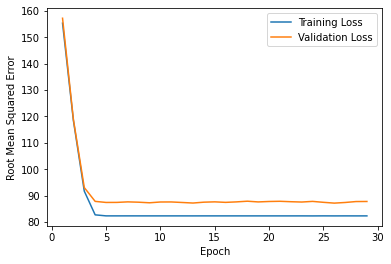

In [10]:
# the following variables are the hyperparameters
learning_rate = 0.08
epochs = 30
batch_size = 100

# Split the original training set into a reduced training set and a validation set
validation_split = 0.3

# Identify the feature and the label
my_feature = "median_income" # the median income on a specific city block
my_label = "median_house_value" # the median value of a house on a specific city block
# That is, you're going to create a model that predicts house value based solely on the neighborhood's median income

# Discard any pre-existing version of the model
my_model = None

# Invoke the function to build and train the model
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature, my_label, epochs, batch_size, validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], history["val_root_mean_squared_error"])

## Tugas 2 : Menentukan mengapa kurva loss berbeda
Tidak peduli bagaimana kamu memisahkan training set dan validation set, kurva loss berbeda secara signifikan.  Ternyata data di training set tidak cukup mirip dengan data di validation set.  Bertentangan dengan intuisi ? Ya, tetapi masalah ini cukup biasa dalam hal machine learning.

Tugasmu adalah menentukan mengapa kurva loss tidak terlalu mirip. Seperti kebanyakan masalah dalam machine learning, masalahnya berakar pada data itu sendiri. untuk memecahkan misteri mengapa training set dan validation set tidak terlalu identik, tulislah sebaris atau 2 baris kode pandas di sel kode berikutnya. Berikut ini beberapa petunjuk:
- kode sebelumnya membagi training set yang asli menjadi :
- - training set yang lebih kecil
- - validation set
- secara default method `head` di pandas mengeluarkan 5 baris DataFrame pertama. Untuk melihat lebih banyak training set, spesifikan argumen `n` di fungsi `head` dan isi kedalam `n` nilai integer positif yang besar.

In [14]:
#@title Double-click for a possible solution to Task 2.

# perhatikan contoh 0 sampai 4 dan contoh 25 sampai 29
train_df.head(n=1000)

#  Training set yang asli diurutkan berdasarkan longitude
# Rupanya, longitude mempengaruhi hubungan antara total_rooms dengan median_house_value

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5
...,...,...,...,...,...,...,...,...,...
995,-117.1,32.5,8.0,6533.0,1217.0,4797.0,1177.0,4.0,144.4
996,-117.1,34.6,6.0,5110.0,1044.0,1938.0,724.0,3.2,112.8
997,-117.1,34.2,22.0,4397.0,931.0,1145.0,445.0,4.5,108.4
998,-117.1,34.0,24.0,4144.0,826.0,2127.0,772.0,2.5,96.0


## Tugas 3 membentulkan masalah
untuk membentulkan masalah, acak contoh didalam training set sebelum memisahkan contoh menjadi training set dan validation set. Untuk melakukan itu, lakukan langkah-langkah berikut:

1. mengacak data di training set dengan menambahkan baris ini dimanapun sebelum memanggil fungsi `train_model`.

`shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index))`

2. kirimkan `shuffled_train_df` (dalam `train_df`) sebagai argumen kedua di fungsi `train_model`. Jadi seperti ini.

`epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature, my_label, epochs, epochs, batch_size, validation_split)`

Epoch 1/30
136/136 [==============================] - 1s 2ms/step - loss: 50893.4375 - root_mean_squared_error: 225.4392 - val_loss: 33808.1055 - val_root_mean_squared_error: 183.8698
Epoch 2/30
136/136 [==============================] - 0s 1ms/step - loss: 30066.9652 - root_mean_squared_error: 173.2826 - val_loss: 18718.8125 - val_root_mean_squared_error: 136.8167
Epoch 3/30
136/136 [==============================] - 0s 1ms/step - loss: 16779.4574 - root_mean_squared_error: 129.3411 - val_loss: 9843.8145 - val_root_mean_squared_error: 99.2160
Epoch 4/30
136/136 [==============================] - 0s 1ms/step - loss: 9129.4176 - root_mean_squared_error: 95.4715 - val_loss: 6869.5752 - val_root_mean_squared_error: 82.8829
Epoch 5/30
136/136 [==============================] - 0s 1ms/step - loss: 6997.7492 - root_mean_squared_error: 83.6456 - val_loss: 6811.8418 - val_root_mean_squared_error: 82.5339
Epoch 6/30
136/136 [==============================] - 0s 1ms/step - loss: 6935.5966 - root

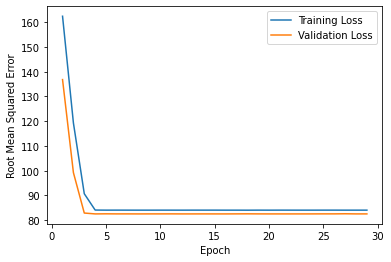

In [15]:
# the following variables are the hyperparameters
learning_rate = 0.08
epochs = 30
batch_size = 100

# Split the original training set into a reduced training set and a validation set
validation_split = 0.2

# Identify the feature and the label
my_feature = "median_income" # the median income on a specific city block
my_label = "median_house_value" # the median value of a house on a specific city block
# That is, you're going to create a model that predicts house value based solely on the neighborhood's median income

# Discard any pre-existing version of the model
my_model = None

# Invoke the function to build and train the model
my_model = build_model(learning_rate)
shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index))
epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature, my_label, epochs, batch_size, validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], history["val_root_mean_squared_error"])

Bereksperimen dengan `validation_split` untuk menjawab pertanyaan berikut:
- dengan training set diacak, apakah final loss untuk training set menjadi lebih dekat ke final loss untuk validation set ?
- di kisaran nilai berapa `validation_split` final loss untuk training set dan validation set berbeda ? mengapa ?

- Jawaban untuk soal yang pertama adalah ya. 

In [16]:
# Jawaban dari google

# Yes, after shuffling the original training set, 
# the final loss for the training set and the 
# validation set become much closer.

# If validation_split < 0.15,
# the final loss values for the training set and
# validation set diverge meaningfully.  Apparently,
# the validation set no longer contains enough examples. 

## Task 4: Use the Test Dataset to Evaluate Your Model's Performance

The test set usually acts as the ultimate judge of a model's quality. The test set can serve as an impartial judge because its examples haven't been used in training the model. Run the following code cell to evaluate the model with the test set:

In [17]:
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

30/30 [==============================] - 0s 983us/step - loss: 7015.3726 - root_mean_squared_error: 83.7578


Compare the root mean squared error of the model when evaluated on each of the three datasets:

* training set: look for `root_mean_squared_error` in the final training epoch.
* validation set: look for `val_root_mean_squared_error` in the final training epoch.
* test set: run the preceding code cell and examine the `root_mean_squred_error`.

Ideally, the root mean squared error of all three sets should be similar. Are they?

In [ ]:
#@title Double-click for an answer

# In our experiments, yes, the rmse values 
# were similar enough. 